<a href="https://colab.research.google.com/github/jiahuili1995/ELEC4630-computer-vision/blob/images/Ass4Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install dlib

install dlib.

In [15]:
# First store some sample images in the folder 'images'
!mkdir -p images
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/passport_image.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0202.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0102.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0302.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0402.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/compared2.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/compared1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/compared3.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/compared4.jpg






File ‘passport_image.jpg’ already there; not retrieving.

File ‘image_0202.jpg’ already there; not retrieving.

--2021-05-18 04:12:58--  https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0102.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234465 (229K) [image/jpeg]
Saving to: ‘image_0102.jpg’

image_0102.jpg      100%[===================>] 228.97K  --.-KB/s    in 0.02s   

2021-05-18 04:12:59 (13.3 MB/s) - ‘image_0102.jpg’ saved [234465/234465]

--2021-05-18 04:12:59--  https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0302.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.c

creat a image folder, input testing and validation images.

In [5]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 99kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=68170f7027160083fcee201cec896e3204567bc8125c82509b45483fef2d8bfd
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


install face recognition model.

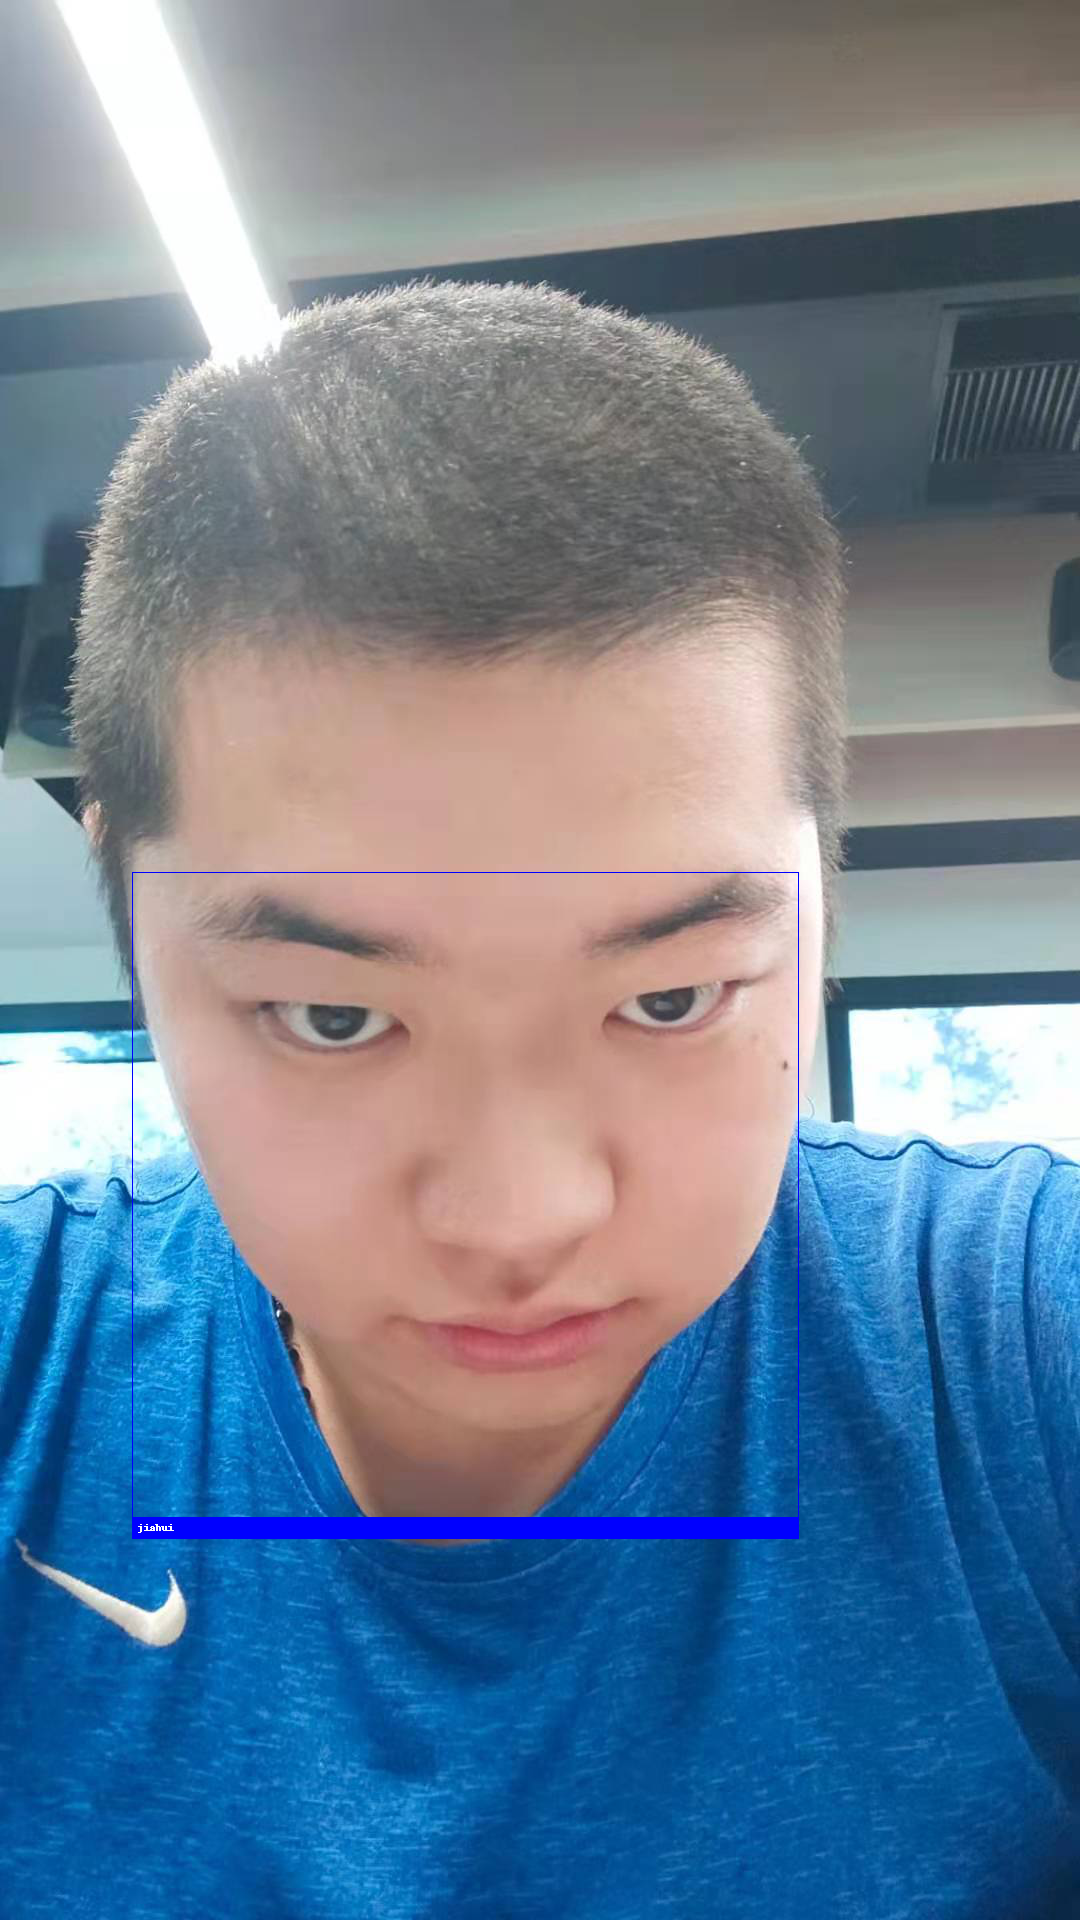

In [14]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
passport_image = face_recognition.load_image_file("images/passport_image.jpg")
passport_face_encoding = face_recognition.face_encodings(passport_image)[0]

# Load a second sample picture and learn how to recognize it.
#biden_image = face_recognition.load_image_file("images/image_0202.jpg")
#biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    passport_face_encoding,
]
known_face_names = [
    "jiahui",
]

# Load an image with an unknown face
unknown_image2 = face_recognition.load_image_file("images/image_0202.jpg")
unknown_image = face_recognition.load_image_file("images/compared3.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

face_locations2 = face_recognition.face_locations(unknown_image2)
face_encodings2 = face_recognition.face_encodings(unknown_image2, face_locations2)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
pil_image2 = Image.fromarray(unknown_image2)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)
draw2 = ImageDraw.Draw(pil_image2)
# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
# pil_image.show()  does not work in iPython
display(pil_image)

# You can also save a copy of the new image to disk if you want by uncommenting this line
# pil_image.save("image_with_boxes.jpg")